# Machine Learning Part 1 - Problems

**Author:** Ties de Kok ([Personal Website](https://www.tiesdekok.com))  <br>
**Last updated:** September 2020  
**Python version:** Python 3.6+     
**Recommended environment: `researchPython`**

In [1]:
import os
recommendedEnvironment = 'researchPython'
if os.environ['CONDA_DEFAULT_ENV'] != recommendedEnvironment:
    print('Warning: it does not appear you are using the {0} environment, did you run "conda activate {0}" before starting Jupyter?'.format(recommendedEnvironment))

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Introduction</span>
</div>

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 20px; font-weight:bold;'> Make sure to open up the respective tutorial notebook(s)! <br> That is what you are expected to use as primariy reference material. </span>
</div>

### Relevant tutorial notebooks:

1) [`0_python_basics.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/0_python_basics.ipynb)  


2) [`2_handling_data.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb)  


3) [`NLP_Notebook.ipynb`](https://nbviewer.jupyter.org/github/TiesdeKok/Python_NLP_Tutorial/blob/master/NLP_Notebook.ipynb)  

## Import required packages

In [2]:
import os, sys
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [6]:
import statsmodels.api as sm

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 1: classification with textual data </span>
</div>  

<div style='border-style: solid; padding: 5px; border-color: darkred; border-width:5px;  text-align: center; margin-left: 100px; margin-right:100px;'>
<span style='color:black; font-size: 15px; font-weight:bold;'> Note: feel free to add as many cells as you'd like to answer these problems, you don't have to fit it all in one cell. </span>
</div>

For part 1 you will work with a dataset of news article headlines. The original dataset is documented here: http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html.

A modified version of the dataset, which are you expected to use, is located here: `data --> news_df.xlsx`.  

The modified dataset contains cleaned up news article titles for two categories: *Business* and *Sport*. 

**Your end goal:** create a machine learning classifier that can identify *Business* headlines from *Sports* headlines. 

----
## 1a) Prepare the data

### 1a - i) Load the `news_df` file using Pandas  

The file is located here: `data --> news_df.xlsx`

### 1a - ii) Drop any rows with missing values in `news_df`

### 1a - iii) Show the number of headlines in the sample for each category  

Do we have to be worried about an imbalanced classification?

### 1a - iiii) Create a new column called `y` that contains a `1` if the category is Business and `0` otherwise 

### 1a - v) Use the logic from session 6 to represent the `title` numerically using the `TFIDF` method.

Use the `stop_words = 'english'` parameter to exclude stopwords.

----
## 1b) Create a train / test split

## 1b i) Create a train - test  split using `train_test_split` with a test size of `0.33`.  
I generally recommend to specify the `random_state` variable to a number of your choice.  

**Note:** to ensure an equal distribution of 1 and 0 between the train / test samples I recommend to use the `stratify` parameter to stratify on the Y column.


## 1b ii) How many observations do you have in your train and test samples?

-----
## 1c) Basic logistic regression  

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 1c - i) Train the logistic regression with the default parameters
I generally recommend to specify the `random_state` variable to a number of your choice.  

**Tip:** you might have to add `max_iter=1000` to make sure the model converges (you'll get a warning otherwise). 

**Reminder:** you train the model based on the training data created in step 1b.

### 1c - ii) Show the classification report  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html  

**Hint 1:** You will first have to predict y based on the X data in your *test* sample.  
**Hint 2:** You will want to compare the true y values for the *test* sample with the predicted y values for the test sample. 

### 1c - iii) Validate your LogisticRegression using 5 fold cross validation.  

Use `cross_val_score` with 5 folds, your scoring metric should be `f1_macro`.

**Question:** does the `f1_macro` reported in `1c-ii` hold up with cross validation?

See: https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

### 1c - iiii) Create a sklearn pipeline to combine the TFIDF model with the logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline

Use `make_pipeline` to combine combine the `TfidfVectorizer` step with the `LogisticRegression` step.

### 1c - v) Train the model again but now use the pipeline you just created  
**Warning:** you will have to recreate your train/test splits but now with the titles themselves because the pipeline will take care of the TFIDF step! 

Follow these steps:

1) Recreate the train/test splits with `news_df['title']` and `news_df['y']` (*Reminder:* test size 33% and with stratify on y)     
2) Train (i.e. fit) the pipeline with the training data  
3) Create the classification report with the test data

### 1c - vi) Use the pipeline to create a prediction for the following out-of-sample sentences:   
```python
sentences = ['The market cap of Apple recently surpassed 2 trillion dollars.', 
             'Seattle Sounders go on record-setting goal barrage vs San Jose Earthquakes.']
```

### 1c - vii) Use `lime` to explain what the model is doing   

For this we will use the `LIME` library, which is not included yet in the `environment.yml` file.

You can read up on it here: https://github.com/marcotcr/lime

You can install `lime` by following these steps:

1. Open up your Anaconda prompt / terminal  
2. Activate the `researchPython` environment  
3. Run `pip install lime`  
4. Import lime into the notebook (see below):

```python
from lime.lime_text import LimeTextExplainer
```

**Your task:** recreate the illustration below for the two out-of-sample sentencesfrom step `1c - vi`.   

**Hint:** https://marcotcr.github.io/lime/tutorials/Lime%20-%20basic%20usage%2C%20two%20class%20case.html

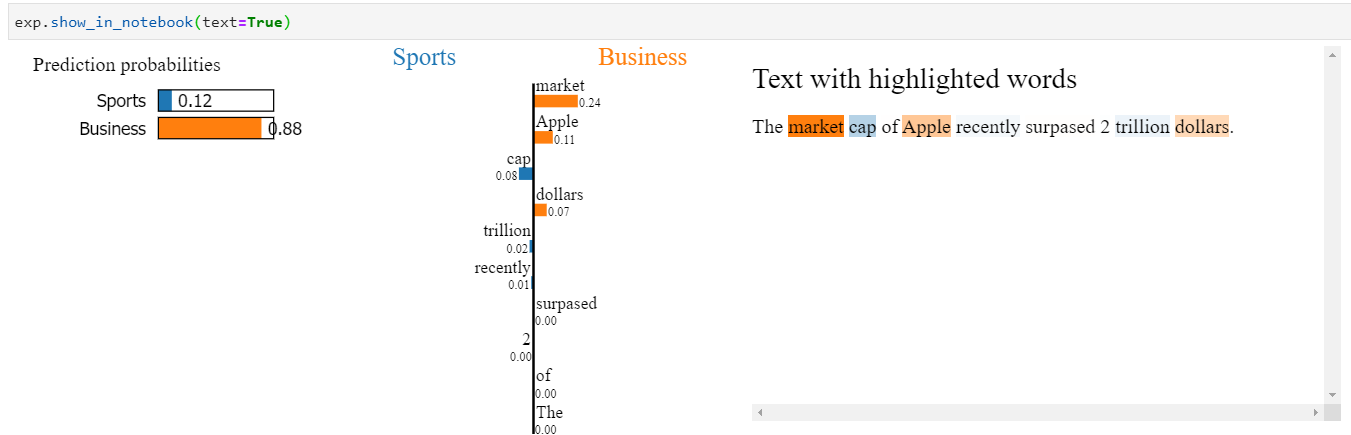

----
## 1d) Basic SVC (SVM) model  

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

The two hyper-parameters that you should be concerned with are:  

- `C`
- `gamma` <-- For a first try you can leave this on the default setting.   




### 1d i) Create & fit a pipeline with the TFIDF vectorizer and the `SVC` model  

Steps:  

1. Create a pipeline   
2. Create a train/test split   
3. Fit the pipeline  

**Note:** training the SVC model is a lot slower compared to the logistic regression, feel free to perform the code below on a smaller set. You can do so with the code below.  

```python
smaller_df = news_df.sample(20000)
```

Obviously a smaller sample is likely to reduce your ML performance, but for the sake of development it can speed things up a lot.

### 1d ii) Show the classification report  

### 1c iii) Perform hyper parameter optimization   
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  

Steps:  

1. Recreate the pipeline but don't specify the parameters (except for maybe random_state)  
2. Create a variable with the following parameter grid:  

```python
param_grid = {
    'tfidfvectorizer__stop_words': ['english', None],
    'svc__C': [1],
    'svc__gamma': [0.001, 'scale'],
    'svc__kernel' : ['rbf']
}
```   
3. Create the gridsearch object using `GridSearchCV` --> use `scoring='f1_macro'`
4. Fit the gridsearch  

**Warning:** This might take some minutes to complete, that is normal. With a single thread (i.e. without `n_jobs=-1`) it will likely take between 3.5 to 5 minutes.
**Tip:** You can try setting `n_jobs=-1` in the `GridSearchCV` function to speed the gridsearch up, this will use all the processing threads in your computer instead of only 1.

**Note:** you are likely to get different results from `GridSearchCV` and your result from `1d - i/ii`, this is because `GridSearchCV` defaults to 5-fold cross validation. 


### 1c - iiii) Show the parameters and classification report for the best performing model

----
## 1d ) Naive Bayes
https://scikit-learn.org/stable/modules/naive_bayes.html

**Task:** combine what you learned above to create a Naive Bayes pipeline to predict the news categories. Make sure to include a classification report.

**Note:** Using the default parameters is fine for this excersise (i.e. you don't have to include the gridsearch step).  

**Warning:** you'll likely get an error about an incompatibility with the spare matrix, you can solve that by adding `FunctionTransformer(lambda x: x.todense(), accept_sparse=True)` to you pipeline in between the vectorizer step and the Naive Bayes step.

<div style='border-style: solid; padding: 10px; border-color: black; border-width:5px;  text-align: left; margin-top:20px; margin-bottom: 20px;'>
<span style='color:black; font-size: 30px; font-weight:bold;'>Part 2: regression with numerical data</span>
</div>

**You end goal:** predict the fare of an airplane ticket departing in Seattle based on: 

* The year  
* The quarter  
* The destination  
* Operating carrier
* Whether the flight has a layover

## 2a) Prepare the data

### 2a - i) Load the dataset  
The dataset is located in `data/sea_ticket_df.xlsx`.  

**Hint:** You can get rid of the `Unnamed: 0` column by specifying `index_col=0` in your `read_excel` function.

### 2a - ii) Convert the `operating_carrier` and `dest` columns to numerical identifiers  

In order to include the `operating_carrier` and `dest` columns we will have to convert them into dummy variables.

We can do so by using `pd.get_dummies(...)`. 

**Hint:** You can add the dummies to the dataframe by using `.join()`.

### 2a - iii) Change `has_overlay` to `1` and `0` instead of `True` and `False`

## 2b) Linear regression   

You can run linear regressions using Python in a wide variety of ways, most notably:  
 
1) Using scikit learn   
    --> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html   
2) Using statsmodels  
    -->  https://www.statsmodels.org/stable/regression.html   
3) Using scipy  
    --> https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html   
4) Using a R or Stata integration (we'll discuss this in the last session)   

Personally I generally use option 4, however, it can sometimes still be useful to know how to do a basic regression in Python.

**For the steps below use `statsmodels`.**

### 2b - i) Run a linear regression with `statsmodels`  

Use `market_fare` as you dependent variable and `year`, `quarter`, `has_layover`, and the destination + carrier_dummies as your independent variables.     

**Tip:** `statmodels` provides a nice summary function that can be accesed using `.summary()`.

See: https://www.statsmodels.org/stable/regression.html

### 2b - ii) Add the predicted market fares back into your dataframe 
